Mean Squared Error: 97.02
Root Mean Squared Error: 9.85
     Actual  Predicted
359   37.19  43.960144
360   31.68  43.671028
361   30.32  46.471500
362   37.55  45.180580
363   40.75  46.355091
..      ...        ...
444   78.12  82.466225
445   76.83  80.602997
446   73.28  79.094658
447   79.45  76.902122
448   71.58  72.716942

[90 rows x 2 columns]


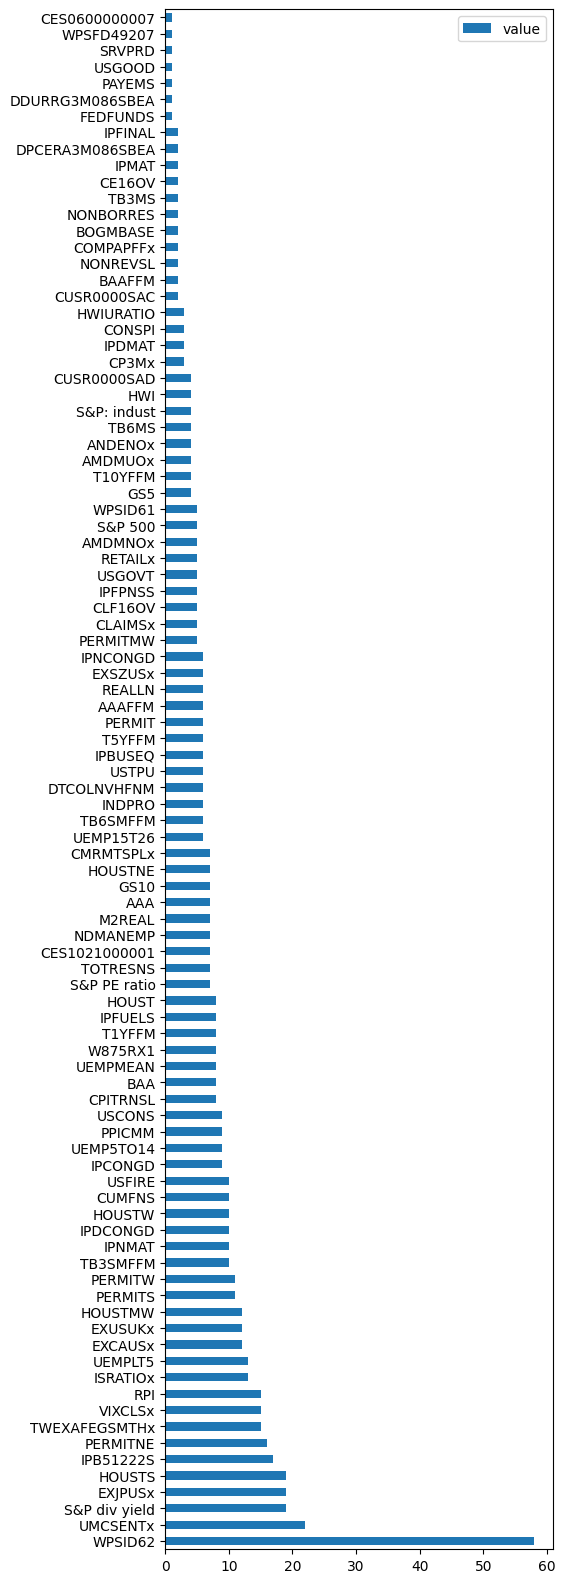

In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import matplotlib as plt

# Load your dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('CleanedDataCut3.csv')
#Drop date and DPB
data.drop(columns=['DPB', 'date'])  # Exclude the target column 'DPB'

# Define your target variable
target_col = 'DPB'

# Split the data into training (80%) and testing (20%) sets
train_size = 0.80
split_index = int(len(data) * train_size)
train_data, test_data = data.iloc[:split_index], data.iloc[split_index:]

# Extract target variables for training and testing sets
y_train = train_data[target_col]
y_test = test_data[target_col]

# Extract features for training and testing sets
X_train = train_data.drop(columns=['date', target_col])
X_test = test_data.drop(columns=['date', target_col])

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(max_depth = 2, n_estimators = 250,learning_rate = 0.1, subsample = .4, min_child_weight = 2, colsample_bytree = .7, objective = 'reg:squarederror', random_state = 5, reg_lambda = 0.2, alpha = 0)
#xgb_model = xgb.XGBRegressor(max_depth = 6, n_estimators = 250,learning_rate = 0.1, subsample = .4, min_child_weight = 2, colsample_bytree = .7, colsample_bylevel = .8, scale_pos_weight = 1, objective = 'reg:squarederror', random_state = 5, gamma = 0.5, reg_lambda = 1)
#xgb_model = xgb.XGBRegressor(max_depth = 2, n_estimators = 250,learning_rate = 0.1, objective = 'reg:squarederror')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["value"]).sort_values(by = "value", ascending=False)
data.nlargest(160, columns="value").plot(kind='barh', figsize = (5,20)) ## plot top 40 features
# Value being feature importance - Larger bar = more important for training

### Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.3}")

# Create a DataFrame to display predicted and actual values side by side
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)